In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### a bit more cleaning (note: most screening in Pete_housing notebook)

In [4]:
df.loc[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [5]:
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0')

df.shape

(21597, 21)

In [6]:
df[['sqft_basement']] = df[['sqft_basement']].apply(pd.to_numeric)

In [7]:
df['area_basement'] = df['sqft_living']-df['sqft_above']

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


### start w/ simple model at first 

In [9]:
#set X & y variables
X = df.drop(['price'], axis = 1)
y = df['price']

In [10]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [11]:
#run simple model w/ best predictor (sqft_living)
model_1_train = X_train[['sqft_living']] 
model_1_test = X_test[['sqft_living']]
model1 = LinearRegression()
model1.fit(model_1_train, y_train)

LinearRegression()

In [12]:
#interpret the error & fit of the model
train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)

train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
print('train error', train_error)
print('test error', test_error)

r_sq = model1.score(model_1_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
#intercept: 5.633333333333329
print('slope:', model1.coef_)
model_info = pd.DataFrame([('intercept', model1.intercept_)] + list(zip(model_1_train.columns, model1.coef_)), columns=['feature', 'weight'])
print(model_info)

train error 262419.7884333472
test error 259878.49234916252
coefficient of determination: 0.4886786453279144
intercept: -47377.18949402089
slope: [281.86285286]
       feature        weight
0    intercept -47377.189494
1  sqft_living    281.862853


#### the model seems balanced, but produces a pretty poor fit 

In [13]:
#options: scaling, binning & encoding, polynomial model

In [14]:
#need to make a copy of the original then do train_test_split on it & continue with below

### copy dataset & prepare for other models

In [15]:
df_2 = df.copy()
df_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [16]:
#set X & y variables
X = df_2.drop(['price'], axis = 1)
y = df_2['price']

In [17]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [18]:
#set predictors by dropping these variables
# X_train_pared = X_train.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'lat', 'long', 'yr_renovated'], axis = 1)
# X_test_pared = X_test.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'lat', 'long', 'yr_renovated'], axis = 1)


In [19]:
X_train_pared =X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]
X_test_pared = X_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]


In [20]:
print(f"X_train_pared is this big: {X_train_pared.shape}")
print(f"X_test_pared is this big: {X_test_pared.shape}")
print(f"y_train is this big: {y_train.shape}")
print(f"y_test is this big: {y_test.shape}")

X_train_pared is this big: (15117, 13)
X_test_pared is this big: (6480, 13)
y_train is this big: (15117,)
y_test is this big: (6480,)


### function for running models (code modified from Joel's)

In [21]:
#this code is heavily borrowed from Joel Collins' solution for the Kaggle exercise
#input for model is previously calculated X_train, etc. data AND list of features from X_train
#to use the model, only change the features & rely on former X_train, etc.
def model(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds = model.predict(model_train)
    test_preds = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds, squared=False)
    test_error = mean_squared_error(y_test, test_preds, squared=False)
    
    # return results
    difference = test_error - train_error
    print('train error', train_error)
    print('test error', test_error)
    print(f'difference: {difference}')

    r_sq = model.score(model_train, y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    #intercept: 5.633333333333329
    model_info = pd.DataFrame([('intercept', model.intercept_)] + list(zip(model_train.columns, model.coef_)), columns=['feature', 'weight'])
    print(model_info)


model_features = ['sqft_living']
model_1_results = model(X_train, X_test, y_train, y_test, model_features)
model_1_results

train error 262419.7884333472
test error 259878.49234916252
difference: -2541.2960841846652
coefficient of determination: 0.4886786453279144
intercept: -47377.18949402089
       feature        weight
0    intercept -47377.189494
1  sqft_living    281.862853


### model2: all numerical values unscaled

In [22]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
6871,9406520290,12/29/2014,3,2.25,1646,12414,2.0,NaN,0.0,3,...,1646,0.0,1996,0.0,98038,47.3630,-122.035,1654,8734,0
14036,1622059095,6/4/2014,3,1.75,1730,11325,1.0,0.0,0.0,5,...,1730,0.0,1972,0.0,98031,47.3921,-122.182,2030,17859,0
14885,2125059163,7/3/2014,4,5.00,4110,43560,2.0,0.0,0.0,4,...,4110,0.0,1978,0.0,98005,47.6353,-122.180,3650,43995,0
20431,3319500628,2/12/2015,3,1.50,1010,1546,2.0,NaN,0.0,3,...,1010,0.0,1971,2014.0,98144,47.5998,-122.311,1010,1517,0
17834,3824100286,3/19/2015,3,2.25,2440,8378,1.0,NaN,0.0,3,...,1480,960.0,1962,NaN,98028,47.7705,-122.260,2510,9602,960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16347,7984400050,9/22/2014,3,1.50,1460,11100,1.0,0.0,0.0,3,...,1460,0.0,1956,0.0,98003,47.3253,-122.298,1460,11100,0
20318,7853320280,3/12/2015,3,2.50,1950,4345,2.0,0.0,0.0,3,...,1950,0.0,2007,0.0,98065,47.5202,-121.873,2260,4345,0
2669,3876000350,2/24/2015,6,1.75,2490,8732,1.5,0.0,0.0,4,...,2490,0.0,1966,0.0,98034,47.7252,-122.187,1840,8024,0
17536,4039400430,5/16/2014,3,1.50,1170,4950,1.0,0.0,0.0,4,...,1170,0.0,1960,0.0,98007,47.6057,-122.135,1570,7700,0


In [23]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']
model_2_results = model(X_train, X_test, y_train, y_test, model_features)
model_2_results

train error 226809.3163724381
test error 225347.17138654352
difference: -1462.1449858945853
coefficient of determination: 0.6180358986328702
intercept: -3908662.141204476
          feature        weight
0       intercept -3.908662e+06
1        bedrooms -5.535659e+04
2       bathrooms  5.299249e+04
3     sqft_living  1.236013e+02
4        sqft_lot -3.758423e-03
5          floors  3.318063e+04
6       condition  1.906736e+04
7           grade  1.251580e+05
8      sqft_above  4.798106e+01
9        yr_built -3.918297e+03
10        zipcode  1.096098e+02
11  sqft_living15  3.206107e+01
12     sqft_lot15 -5.386288e-01
13  area_basement  7.562026e+01


In [24]:
#run full model w/ all predictors
#update with new model that includes the updated array of dropped X values
# model2 = LinearRegression()
# model2.fit(X_train_pared, y_train)

### save this code for visualizing model output

In [25]:
#build on this by adding model performance across quantiles of price data using pd.qcut
# model_info = pd.DataFrame([('intercept', model2.intercept_)] + list(zip(X_train_pared.columns, model2.coef_)), columns=['feature', 'weight'])
# plt.figure(figsize=(15,6))
# plt.bar(model_info.feature[1:], model_info.weight[1:])
# model_info

In [26]:
#interpret the error & fit of the model
# train_preds = model2.predict(X_train_pared)
# test_preds = model2.predict(X_test_pared)

# train_error = mean_squared_error(y_train, train_preds, squared=False)
# test_error = mean_squared_error(y_test, test_preds, squared=False)
# print('train error', train_error)
# print('test error', test_error)

# r_sq = model2.score(X_train_pared, y_train)
# print('coefficient of determination:', r_sq)
# print('intercept:', model2.intercept_)
# intercept: 5.633333333333329
# print('slopes:', model2.coef_)
# #coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model2.coef_))], axis = 1)
# print(coefficients)

#### Model 3: run model 2 scaled

In [27]:
#scale training data
scaler = RobustScaler() #there are other options
scaler.fit(X_train_pared) #do this in first step w/ only train data
X_train_scaled = scaler.transform(X_train_pared) 

In [28]:
# Scale the test set, with same scalar
X_test_scaled = scaler.transform(X_test_pared)

In [29]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']

model_3_results = model(X_train, X_test, y_train, y_test, model_features)
model_3_results

train error 226809.3163724381
test error 225347.17138654352
difference: -1462.1449858945853
coefficient of determination: 0.6180358986328702
intercept: -3908662.141204476
          feature        weight
0       intercept -3.908662e+06
1        bedrooms -5.535659e+04
2       bathrooms  5.299249e+04
3     sqft_living  1.236013e+02
4        sqft_lot -3.758423e-03
5          floors  3.318063e+04
6       condition  1.906736e+04
7           grade  1.251580e+05
8      sqft_above  4.798106e+01
9        yr_built -3.918297e+03
10        zipcode  1.096098e+02
11  sqft_living15  3.206107e+01
12     sqft_lot15 -5.386288e-01
13  area_basement  7.562026e+01


In [30]:
#run full model w/ all predictors scaled
# model3 = LinearRegression()
# model3.fit(X_train_scaled, y_train)

In [31]:
#interpret the error & fit of the model
# train_preds = model3.predict(X_train_scaled)
# test_preds = model3.predict(X_test_scaled)

# train_error = mean_squared_error(y_train, train_preds, squared=False)
# test_error = mean_squared_error(y_test, test_preds, squared=False)
# print('train error', train_error)
# print('test error', test_error)

# r_sq = model3.score(X_train_scaled, y_train)
# print('coefficient of determination:', r_sq)
# print('intercept:', model3.intercept_)
# intercept: 5.633333333333329
# print('slopes:', model3.coef_)

### Model4: re-run model 3 w/ log price

In [32]:
df_3 = df_2.copy()
df_3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [33]:
df_3['log_price'] = np.log(df_3['price'])

In [34]:
#set X & y variables
X = df_3.drop(['price', 'log_price'], axis = 1)
y = df_3['log_price']

In [35]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [36]:
X_train_4 =X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]
X_test_4 = X_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]

In [37]:
print(f"X_train_4 is this big: {X_train_4.shape}")
print(f"X_test_4 is this big: {X_test_4.shape}")
print(f"y_train is this big: {y_train.shape}")
print(f"y_test is this big: {y_test.shape}")

X_train_4 is this big: (15117, 13)
X_test_4 is this big: (6480, 13)
y_train is this big: (15117,)
y_test is this big: (6480,)


In [38]:
#run full model w/ all predictors
#update with new model that includes the updated array of dropped X values
model4 = LinearRegression()
model4.fit(X_train_4, y_train)

LinearRegression()

In [39]:
#interpret the error & fit of the model
train_preds = model4.predict(X_train_4)
test_preds = model4.predict(X_test_4)

train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
print('train error', train_error)
print('test error', test_error)

r_sq = model4.score(X_train_4, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model4.intercept_)
intercept: 5.633333333333329
print('slopes:', model4.coef_)

train error 0.3112193874647617
test error 0.31555565369586946
coefficient of determination: 0.6484449290050482
intercept: -22.720036432315737
slopes: [-3.20129906e-02  8.19955896e-02  1.06059446e-04  1.97107591e-07
  1.22867116e-01  4.55930409e-02  2.12198185e-01  3.72841717e-06
 -5.52114109e-03  4.49926113e-04  1.18938466e-04 -3.77496344e-07
  1.02331029e-04]


1. Find the difference between true y and predicted y
2. Plot predicted y on the x axis and error on y axis (scatter plot)

### model5: simplified model 3 w/ fewer features

In [40]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'zipcode']

model_5_results = model(X_train, X_test, y_train, y_test, model_features)
model_5_results

train error 0.31603763528600554
test error 0.3221956438270552
difference: 0.006158008541049642
coefficient of determination: 0.6374752291314978
intercept: -17.765783556944978
       feature        weight
0    intercept -1.776578e+01
1     bedrooms -3.312242e-02
2    bathrooms  8.856008e-02
3  sqft_living  1.856074e-04
4     sqft_lot -4.136834e-08
5       floors  8.048556e-02
6    condition  4.746292e-02
7        grade  2.297125e-01
8     yr_built -5.605777e-03
9      zipcode  4.013010e-04


#### this more simple model results in poorer performance

### Model6: adding new interaction features

In [41]:
#new df to work with given new features
df_3 = df.copy()

In [42]:
df_3['living*bath'] = df_3['sqft_living']*df_3['bathrooms']
df_3['living*grade'] = df_3['sqft_living']*df_3['grade']
df_3['bath*bed'] = df_3['bathrooms']*df_3['bedrooms']
df_3.view = df_3.view.replace(np.nan, 0)
df_3.waterfront = df_3.waterfront.replace(np.nan, 0)
df_3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement,living*bath,living*grade,bath*bed
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,0,1180.0,8260,3.00
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,400,5782.5,17990,6.75
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,NaN,98028,47.7379,-122.233,2720,8062,0,770.0,4620,2.00
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,910,5880.0,13720,12.00
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,0,3360.0,13440,6.00


In [43]:
#set X & y variables
X = df_3.drop(['price'], axis = 1)
y = df_3['price']

In [44]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [45]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement', 'living*bath', 
        'living*grade', 'bath*bed', 'lat', 'waterfront', 'long', 'view']

model_6_results = model(X_train, X_test, y_train, y_test, model_features)
model_6_results

train error 186785.16482057775
test error 189157.97843881513
difference: 2372.8136182373855
coefficient of determination: 0.7409488475212895
intercept: 7653514.140705848
          feature        weight
0       intercept  7.653514e+06
1        bedrooms  3.005867e+04
2       bathrooms  3.617879e+04
3     sqft_living -1.674350e+02
4        sqft_lot  3.614369e-02
5          floors  4.160821e+04
6       condition  3.347761e+04
7           grade  2.054684e+04
8      sqft_above -9.168254e+01
9        yr_built -2.316182e+03
10        zipcode -5.467794e+02
11  sqft_living15  3.871335e+01
12     sqft_lot15 -3.354524e-01
13  area_basement -7.575247e+01
14    living*bath  3.711592e+01
15   living*grade  3.395278e+01
16       bath*bed -1.910191e+04
17            lat  5.977795e+05
18     waterfront  5.664673e+05
19           long -1.797933e+05
20           view  4.845551e+04


In [67]:
def plot_bins(model, X, y, bins=10, title='binned error'):
    q=pd.qcut(y, bins) #magical pandas function, makes quantiles (10 in this case)
    frame=pd.DataFrame(q) #takes cuts into a df so you can do groupby later
    frame['error']=model.predict(X)-y #estimates error
    frame.columns = ['bins', 'errors'] #reset column names
    frame=frame.groupby('bins').mean() #gather all obs in each bin & take avg of them all
    frame.plot(kind='bar', figsize=(15,6), title=title)

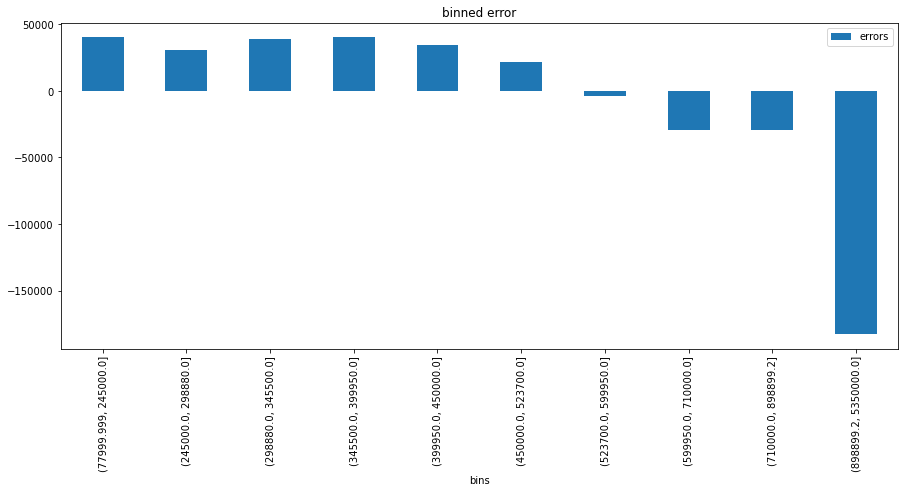

In [68]:
model6=LinearRegression()
model6.fit(X_train[model_features], y_train)
plot_bins(model6, X_test[model_features], y_test)

In [63]:
q=pd.qcut(y_test, 10)
frame=pd.DataFrame(q)

In [64]:
frame

,price
16925,"(245000.0, 298880.0]"
10808,"(298880.0, 345500.0]"
9088,"(298880.0, 345500.0]"
10096,"(245000.0, 298880.0]"
4414,"(710000.0, 898899.2]"
...,...
7488,"(450000.0, 523700.0]"
2657,"(77999.999, 245000.0]"
10756,"(599950.0, 710000.0]"
5550,"(399950.0, 450000.0]"


In [ ]:
#some possible options: 1) polynomial, 2) an if:then function w/in model to only apply predictors in particular ranges
# 3) bin zip codes into categories & do OneHotEncoding 4) look for feature engineering that would decrease error across
# lower cost houses 5) transformations of non-linear predictors 6) log transforming price & looking at performance across bins

### Model 7: polynomial model